In [9]:
import pandas as pd
import glob
import os
import seaborn as sns

In [2]:
!pip install -q pandas matplotlib numpy seaborn scikit-learn

In [7]:
dirname = "../eval/LogicKor/results/peft:heegyu/0708-ko-prometheus@epoch-1"
dfs = []
for file in glob.glob(os.path.join(dirname, "*.jsonl")):
    df = pd.read_json(file, lines=True)
    df["filename"] = os.path.basename(file).replace(".jsonl", "").replace("judge_", "")
    df["prometheus_score"] = df.judgement.apply(lambda x: int(x.split("[RESULT]", 1)[-1].strip()))
    df["gpt4_score"] = df.query_single.apply(lambda x: x["judge_score"])
    dfs.append(df)

dfs = pd.concat(dfs)
dfs

,id,category,questions,outputs,references,query_single,query_multi,judge_name,judgement,filename,prometheus_score,gpt4_score
0,14,수학(Math),"[f(x) = 3x^3 + 2x^2 + 58을 미분하시오., 미분한 식을 한 번 더...","[f'(x) = 9x^2 + 4x, f''(x) = 18x + 4]","[9x^2 + 4x, 18x + 4]","{'judge_message': '모델의 답변은 정확하고, 질문에 요구된 미분 계산...",{'judge_message': '모델이 미분한 식을 한 번 더 미분하는 요구를 정...,peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 주어진 함수 f(x) = 3x^3 + 2x^2 + 58를 미분한 결과를 ...,gpt-3.5-turbo-0125,5,10.0
1,12,수학(Math),"[벡터 A(4, 5, 2), B(1,3,2)를 내적해라., 두 벡터의 코사인 유사도...","[두 벡터 A와 B의 내적은 각 성분끼리 곱한 후 모두 더한 값이다.\n\nA(4,...","[23, 답은 0.9163 또는 23 / (3sqrt(70)). 단, 계산 과정 및...",{'judge_message': '모델이 벡터 A와 B의 내적을 정확하게 계산하여 ...,"{'judge_message': '모델이 제공한 벡터의 크기 계산은 정확하며, 코사...",peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 벡터 A와 B의 내적을 정확하게 계산하고 결과를 제시하고 있습니다. 벡터...,gpt-3.5-turbo-0125,5,10.0
2,26,코딩(Coding),"[PyTorch를 사용해서 간단한 CNN을 구현해봐., ReLU가 뭔지 설명해주고,...",[Sure! Here is a simple example of implementin...,"[None, None]",{'judge_message': '요청된 언어 요구사항을 준수하지 않고 영어로 답변...,"{'judge_message': '모델이 ReLU 함수에 대해 정확하게 설명하고, ...",peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 PyTorch를 사용하여 간단한 CNN을 구현하는 데 필요한 모든 단계를...,gpt-3.5-turbo-0125,5,0.0
3,6,추론(Reasoning),[민수의 책상 위에는 연필 12자루가 있다. 지아가 연필 한 자루를 빌려 갔고 현수...,"[민수의 책상 위에는 총 12자루의 연필이 있었고, 지아와 현수가 각각 한 자루씩 ...","[5개, None]","{'judge_message': '모델이 제공한 답변은 정확하고, 질문의 요구사항을...","{'judge_message': '모델이 제시한 문제는 원래 질문과 유사하며, 풀이...",peft:heegyu/0708-ko-prometheus@epoch-1,"이 응답은 주어진 문제를 정확하게 해결하고 있습니다. 연필의 수를 계산하고, 민수가...",gpt-3.5-turbo-0125,5,10.0
4,22,코딩(Coding),"[시간 복잡도를 어떻게 구할 수 있는지 설명해주고, 많이 쓰이는 알고리즘 중에 최적...",[시간 복잡도는 알고리즘이 입력 크기에 따라 실행 시간이 어떻게 증가하는지를 나타내...,"[None, None]",{'judge_message': '시간 복잡도를 구하는 방법과 최적화를 통해 시간 ...,{'judge_message': '모델은 시간 복잡도와 공간 복잡도의 차이를 명확하...,peft:heegyu/0708-ko-prometheus@epoch-1,"이 응답은 시간 복잡도를 정의하고, 빅오 표기법을 사용하여 시간 복잡도를 표현하는 ...",gpt-3.5-turbo-0125,3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37,19,글쓰기(Writing),"[새로 오픈한 카페를 홍보하려고 합니다. 홍보 대상, 홍보 전략을 선정하고 대상을 ...",[홍보 대상: 지역 커뮤니티 및 카페 애호가\n\n홍보 전략:\n1. **소셜 미디...,"[None, None]","{'judge_message': '모델은 홍보 대상과 전략을 명확하게 제시하고, 설...",{'judge_message': '모델은 홍보 대상인 '젊은 직장인'에 맞춰 적절한...,peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 카페의 홍보를 위한 전략과 메시지를 효과적으로 제시하고 있습니다. 소셜 ...,nlpai-lab_KULLM3,5,9.0
38,4,추론(Reasoning),"[A, B, C 세 사람 중 한 명이 유리를 깨뜨렸습니다. 경찰이 찾아와 범인을 찾...",[세 사람의 진술을 바탕으로 범인을 찾아보겠습니다.\n\n1. A는 C가 범인이라고...,"[B, None]","{'judge_message': '모델이 제시한 추론 과정은 올바르지 않지만, 결론...",{'judge_message': '모델이 제시한 문제는 원래의 문제와 유사한 형식을...,peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 세 사람의 진술을 바탕으로 범인을 찾으려는 시도를 보여줍니다. 그러나 이...,nlpai-lab_KULLM3,1,6.0
39,21,글쓰기(Writing),[자본론을 쓴 카를 마르크스가 오늘날의 비트코인 폭등과 같은 경제 현상을 어떻게 바...,"[카를 마르크스가 오늘날의 비트코인 폭등과 같은 경제 현상을 바라보았을 때, 그는 ...","[None, None]",{'judge_message': '모델은 마르크스의 관점에서 비트코인 폭등 현상을 ...,{'judge_message': '모델은 마르크스의 관점에서 현대 사회의 문제를 분...,peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 마르크스의 관점에서 비트코인 폭등과 같은 경제 현상을 분석하는 데 있어 ...,nlpai-lab_KULLM3,3,8.0
40,22,코딩(Coding),"[시간 복잡도를 어떻게 구할 수 있는지 설명해주고, 많이 쓰이는 알고리즘 중에 최적...","[알고리즘의 시간 복잡도를 구하는 방법은 여러 가지가 있지만, 가장 일반적인 방법은...","[None, None]",{'judge_message': '모델이 시간 복잡도를 구하는 방법과 최적화를 통해...,{'judge_message': '모델이 시간 복잡도와 공간 복잡도의 차이를 명확하...,peft:heegyu/0708-ko-prometheus@epoch-1,이 응답은 시간 복잡도를 계산하는 방법과 최적화를 통해 시간 복잡도를 줄인 알고리즘...,nlpai-lab_KULLM3,3,6.0


<Axes: xlabel='prometheus_score', ylabel='gpt4_score'>

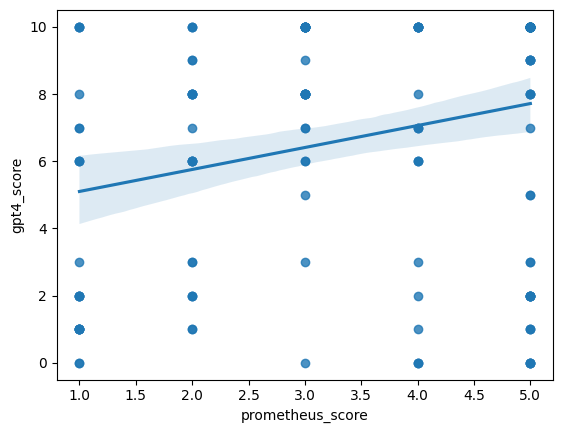

In [10]:
# dfs.plot.regplot(x="prometheus_score", y="gpt4_score")
sns.regplot(data=dfs, x="prometheus_score", y="gpt4_score")

/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/heegyu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47200 (\N{HANGUL SYLLABLE RON}) missin

/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/heegyu/.local/lib/python3.10/site-packages/IPython/core/events.py:82: U

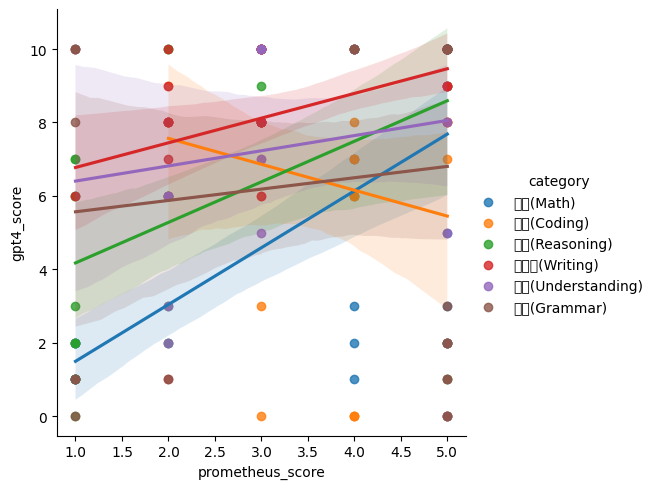

In [12]:
sns.lmplot(data=dfs, x="prometheus_score", y="gpt4_score", hue="category")